In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

import csv
import cc_acquire
import cc_prepare
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import cc_explore

In [2]:
train = pd.read_csv('train_imputed.csv', index_col=0)

In [8]:
import cc_prepare
cc_prepare.nulls_by_col(train).head()

,num_rows_missing,percent_rows_missing
unit_id_institution,0,0.00
college_name,0,0.00
deg_percent_awarded_psychology,0,0.00
deg_percent_awarded_science_tech,0,0.00
deg_percent_awarded_physical_sciences,0,0.00


In [9]:
train.shape

(38385, 112)

In [11]:
train.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,income_0_30000,income_30001_48000,income_48001_75000,income_75001_110000,income_over_110000
25656,168847,Baker College,"Private, nonprofit",MI,48867,Owosso,midwest,1.00,3.00,3.00,...,36.68,1.87,186.52,5.35,534.60,203.00,83.00,72.00,52.00,29.00
28625,216852,Widener University,"Private, nonprofit",PA,19013-5792,Chester,northeast,1.00,3.00,3.00,...,37.91,1.94,193.77,5.56,555.86,79.00,64.00,100.00,137.00,269.00
36032,199272,William Peace University,"Private, nonprofit",NC,27604-1194,Raleigh,southeast,1.00,3.00,3.00,...,15.08,1.44,143.99,4.43,443.45,57.00,28.00,27.00,33.00,36.00
30254,215655,Robert Morris University,"Private, nonprofit",PA,15108-1189,Moon Township,northeast,1.00,3.00,3.00,...,-5.48,1.00,100.11,3.45,345.63,109.00,86.00,148.00,152.00,226.00
68185,147767,Northwestern University,"Private, nonprofit",IL,60208,Evanston,midwest,1.00,3.00,3.00,...,16.11,1.48,147.89,4.54,454.00,50.00,90.00,146.00,138.00,351.00


In [10]:
train.columns.tolist()

['unit_id_institution',
 'college_name',
 'institution_control',
 'state_post_code',
 'zip_code',
 'city',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_name',
 'degree_code',
 'major_code',
 'major_name',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_time_unknown_race',
 'comp_rt_ft_150over_expected_time_white',
 'share_entering_students_first_ft'

In [5]:
basic_info_cols = ['unit_id_institution','college_name','institution_control','region_ipeds','branch_number',
                   'state_post_code','zip_code','city','title_IV_eligibility','major_code','graduate_number',
                   'major_name','admission_rate', 'online_only','enrollment_share_two_races',
                   'enrollment_share_native_american','enrollment_share_asian','enrollment_share_black',
                   'enrollment_share_hispanic','enrollment_share_pac_islander','enrollment_share_non_resident',
                   'enrollment_share_unknown','enrollment_share_white','major_category','2017','2018','2019',
                   'Grand Total','roi_5yr','pct_roi_5yr','avg_sat_admitted','ACT_score_mid','required_score',
                   'first_time_ft_student_retention','first_time_pt_student_retention','avg_net_price',
                   'income_0_30000','income_30001_48000','income_48001_75000','income_75001_110000','income_over_110000']
train1 = train[basic_info_cols]
train1.head()

,unit_id_institution,college_name,institution_control,region_ipeds,branch_number,state_post_code,zip_code,city,title_IV_eligibility,major_code,...,ACT_score_mid,required_score,first_time_ft_student_retention,first_time_pt_student_retention,avg_net_price,income_0_30000,income_30001_48000,income_48001_75000,income_75001_110000,income_over_110000
25656,168847,Baker College,"Private, nonprofit",midwest,2.00,MI,48867,Owosso,1.00,"2,401.00",...,23.53,2.00,0.62,0.44,"12,329.00",203.00,83.00,72.00,52.00,29.00
28625,216852,Widener University,"Private, nonprofit",northeast,1.00,PA,19013-5792,Chester,1.00,"4,008.00",...,23.00,1.00,0.78,0.16,"31,305.00",79.00,64.00,100.00,137.00,269.00
36032,199272,William Peace University,"Private, nonprofit",southeast,1.00,NC,27604-1194,Raleigh,1.00,"4,301.00",...,21.00,1.00,0.65,0.37,"24,016.00",57.00,28.00,27.00,33.00,36.00
30254,215655,Robert Morris University,"Private, nonprofit",northeast,1.00,PA,15108-1189,Moon Township,1.00,"3,105.00",...,25.00,1.00,0.81,0.33,"26,027.00",109.00,86.00,148.00,152.00,226.00
68185,147767,Northwestern University,"Private, nonprofit",midwest,1.00,IL,60208,Evanston,1.00,"4,512.00",...,29.00,1.00,0.94,0.73,"24,840.00",50.00,90.00,146.00,138.00,351.00


## Major
### 1. How is the majors summary in US?

<AxesSubplot:xlabel='count', ylabel='major_category'>

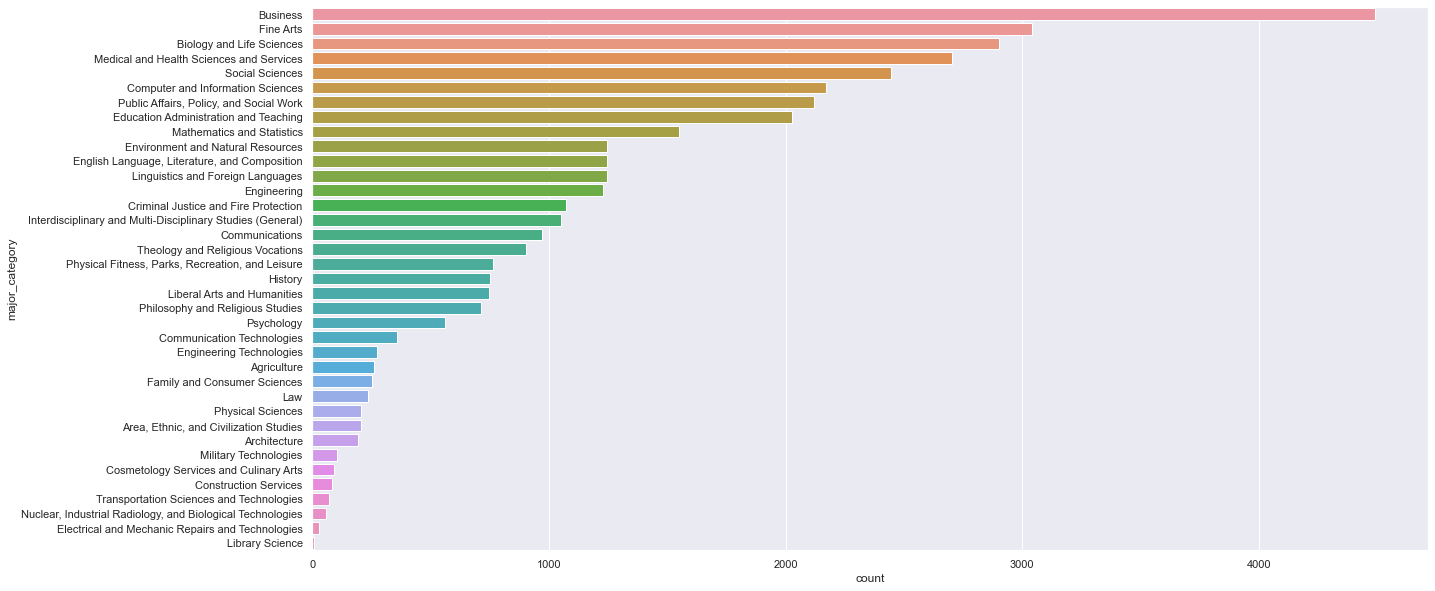

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train1, order = train1['major_category'].value_counts().index)

In [15]:
# top 10
train1.major_category.value_counts().head(10)

Business                                    4491
Fine Arts                                   3041
Biology and Life Sciences                   2902
Medical and Health Sciences and Services    2702
Social Sciences                             2446
Computer and Information Sciences           2170
Public Affairs, Policy, and Social Work     2120
Education Administration and Teaching       2026
Mathematics and Statistics                  1551
Environment and Natural Resources           1247
Name: major_category, dtype: int64

* Top 10 majors:
    1. Business
    2. Fine Arts                     
    3. Biology and Life Sciences                
    4. Medical and Health Sciences and Services   
    5. Social Sciences      
    6. Computer and Information Sciences      
    7. Public Affairs, Policy, and Social Work  
    8. Education Administration and Teaching   
    9. Mathematics and Statistics     
    10. Environment and Natural Resources    

In [27]:
# least 10
train1.major_category.value_counts().tail(10)

Physical Sciences                                             207
Area, Ethnic, and Civilization Studies                        206
Architecture                                                  195
Military Technologies                                         103
Cosmetology Services and Culinary Arts                         91
Construction Services                                          85
Transportation Sciences and Technologies                       71
Nuclear, Industrial Radiology, and Biological Technologies     59
Electrical and Mechanic Repairs and Technologies               29
Library Science                                                 8
Name: major_category, dtype: int64

* Least 10:
    1. Physical Sciences                         
    2. Area, Ethnic, and Civilization Studies          
    3. Architecture            
    4. Military Technologies       
    5. Cosmetology Services and Culinary Arts  
    6. Construction Services       
    7. Transportation Sciences and Technologies  
    8. Nuclear, Industrial Radiology, and Biological Technologies 
    9. Electrical and Mechanic Repairs and Technologies   
    10. Library Science

## 2. Major summary in different school type

### public

<AxesSubplot:xlabel='count', ylabel='major_category'>

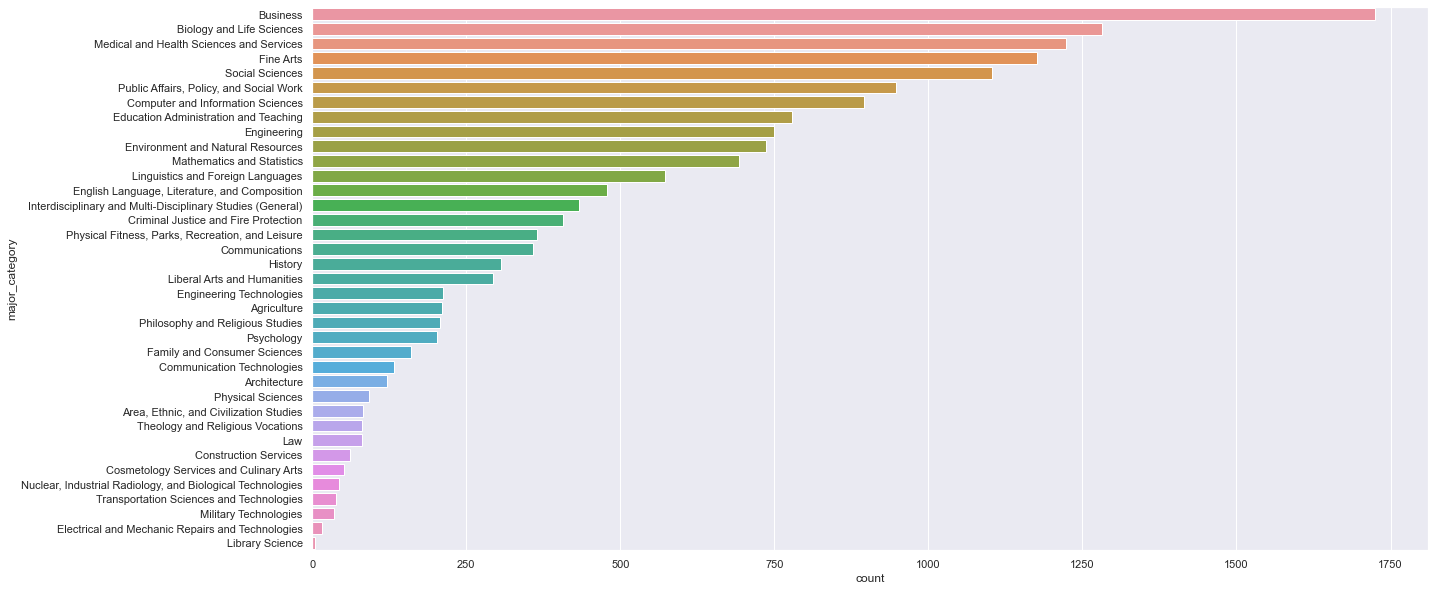

In [16]:
# public
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train1[train1.institution_control == 'Public'],
              order = train1[train1.institution_control == 'Public']['major_category'].value_counts().index)

In [17]:
# top 5
train1[train1.institution_control == 'Public'].major_category.value_counts().head()

Business                                    1725
Biology and Life Sciences                   1281
Medical and Health Sciences and Services    1223
Fine Arts                                   1177
Social Sciences                             1104
Name: major_category, dtype: int64

In [18]:
# least 5
train1[train1.institution_control == 'Public'].major_category.value_counts().tail()

Nuclear, Industrial Radiology, and Biological Technologies    43
Transportation Sciences and Technologies                      38
Military Technologies                                         35
Electrical and Mechanic Repairs and Technologies              16
Library Science                                                5
Name: major_category, dtype: int64

### Private, for-profit

<AxesSubplot:xlabel='count', ylabel='major_category'>

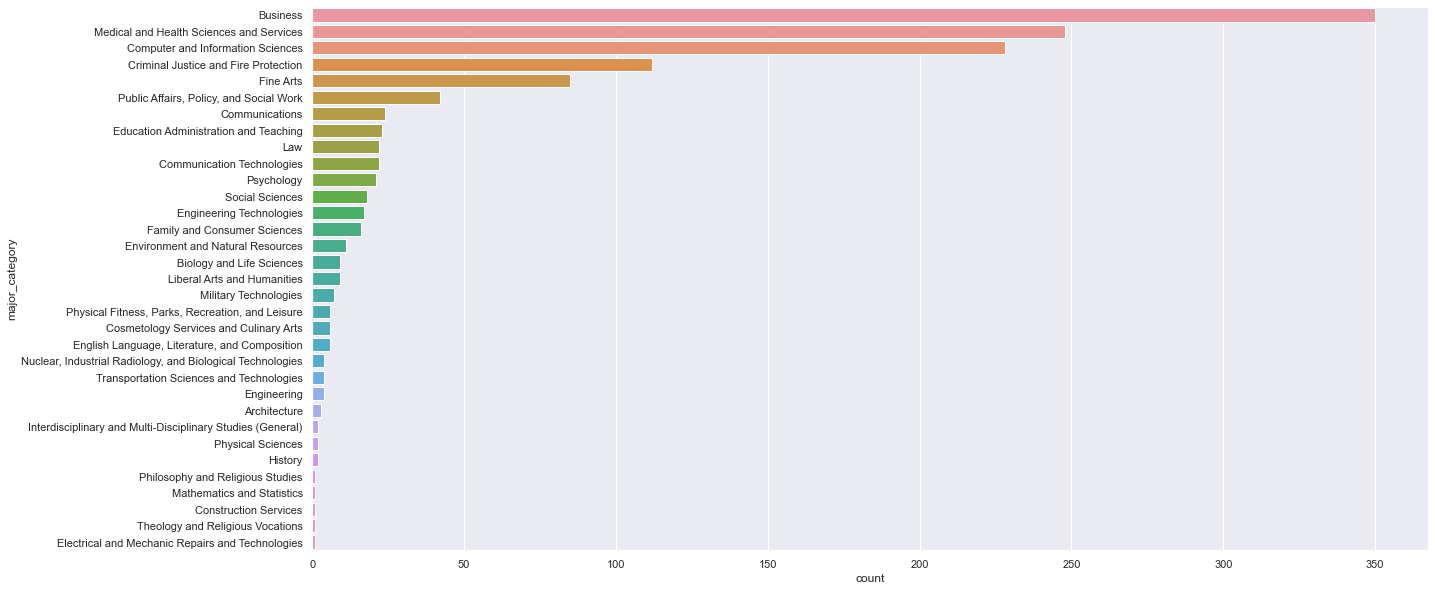

In [19]:
# Private, for-profit
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train1[train1.institution_control == 'Private, for-profit'],
              order = train1[train1.institution_control == 'Private, for-profit']['major_category'].value_counts().index)

In [20]:
# top 5
train1[train1.institution_control == 'Private, for-profit'].major_category.value_counts().head()

Business                                    350
Medical and Health Sciences and Services    248
Computer and Information Sciences           228
Criminal Justice and Fire Protection        112
Fine Arts                                    85
Name: major_category, dtype: int64

In [21]:
# least 5
train1[train1.institution_control == 'Private, for-profit'].major_category.value_counts().tail()

Philosophy and Religious Studies                    1
Mathematics and Statistics                          1
Construction Services                               1
Theology and Religious Vocations                    1
Electrical and Mechanic Repairs and Technologies    1
Name: major_category, dtype: int64

### Private, non-profit

<AxesSubplot:xlabel='count', ylabel='major_category'>

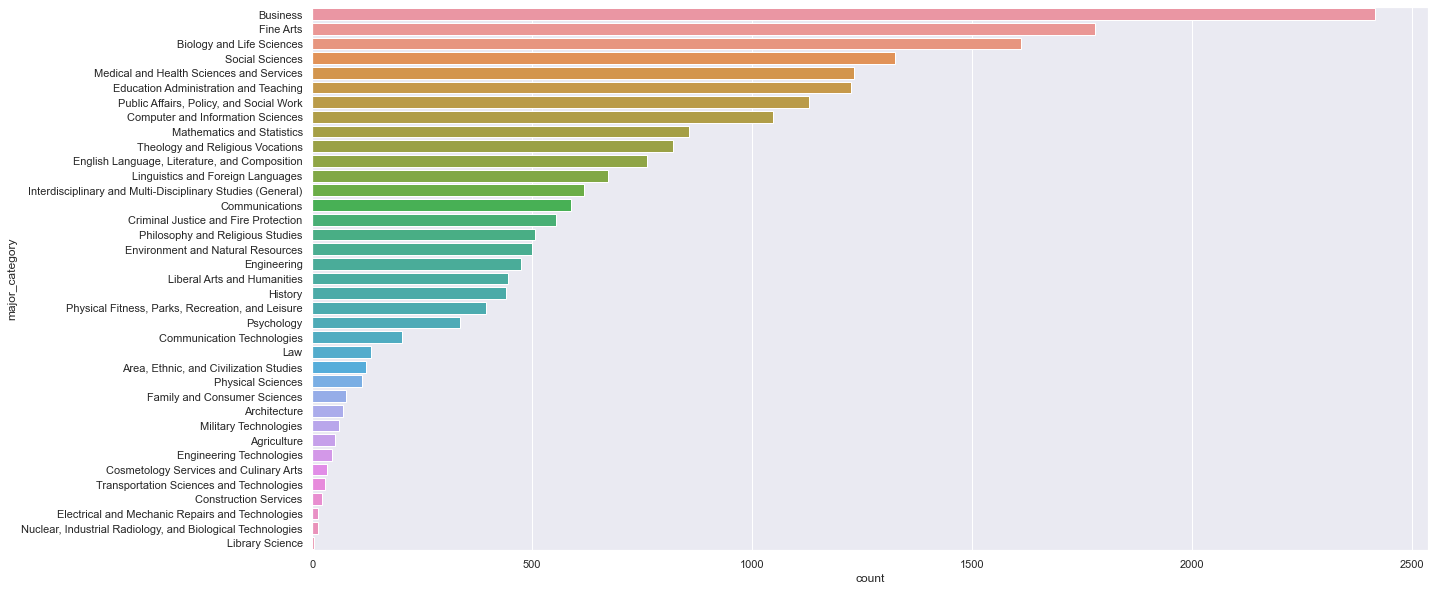

In [22]:
# Private, nonprofit
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train1[train1.institution_control == 'Private, nonprofit'],
              order = train1[train1.institution_control == 'Private, nonprofit']['major_category'].value_counts().index)

In [23]:
# top 5
train1[train1.institution_control == 'Private, nonprofit'].major_category.value_counts().head()

Business                                    2416
Fine Arts                                   1779
Biology and Life Sciences                   1612
Social Sciences                             1324
Medical and Health Sciences and Services    1231
Name: major_category, dtype: int64

In [24]:
# least 5
train1[train1.institution_control == 'Private, nonprofit'].major_category.value_counts().tail()

Transportation Sciences and Technologies                      29
Construction Services                                         23
Electrical and Mechanic Repairs and Technologies              12
Nuclear, Industrial Radiology, and Biological Technologies    12
Library Science                                                3
Name: major_category, dtype: int64

### 3. Top 10 5-year-ROI across majors.

<AxesSubplot:xlabel='roi_5yr', ylabel='major_category'>

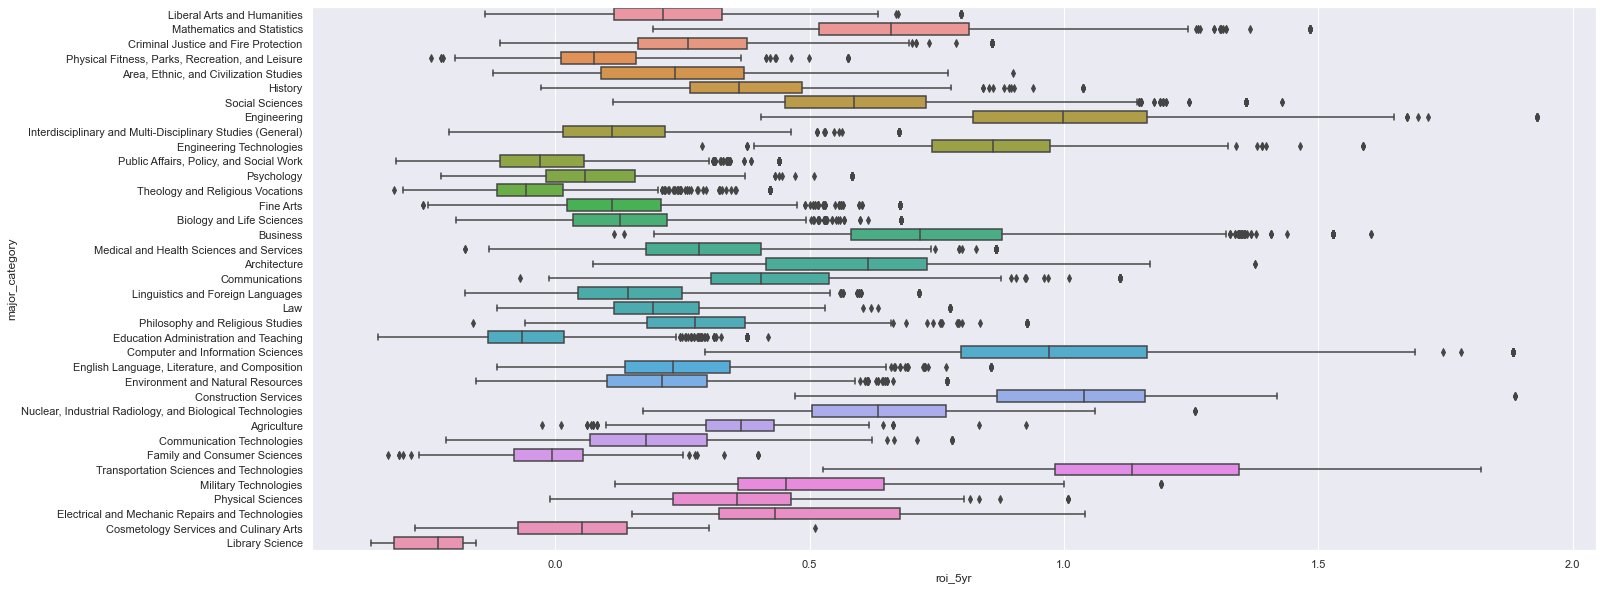

In [25]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='roi_5yr', data = train1)

In [26]:
# top ten 5-year-ROI avg by majors
train1.groupby('major_category').roi_5yr.mean().nlargest(10)

major_category
Transportation Sciences and Technologies                                     1.15
Construction Services                                                        1.04
Computer and Information Sciences                                            1.01
Engineering                                                                  1.00
Engineering Technologies                                                     0.86
Business                                                                     0.75
Mathematics and Statistics                                                   0.67
Nuclear, Industrial Radiology, and Biological Technologies                   0.65
Social Sciences                                                              0.60
Architecture                                                                 0.58
Name: roi_5yr, dtype: float64

* Top ten 5-year-ROI:
1. Transportation Sciences and Technologies  
2. Construction Services 
3. Computer and Information Sciences  
4. Engineering           
5. Engineering Technologies   
6. Business                    
7. Mathematics and Statistics                                
8. Nuclear, Industrial Radiology, and Biological Technologies      
9. Social Sciences                                               
10. Architecture

* Transportation Sciences and Technologies, Construction Services,Nuclear, Industrial Radiology, Biological Technologies, Architecture are least popular major
* 10-year and 20-year are the same answer

### 4. Admission rate by major

<AxesSubplot:xlabel='admission_rate', ylabel='major_category'>

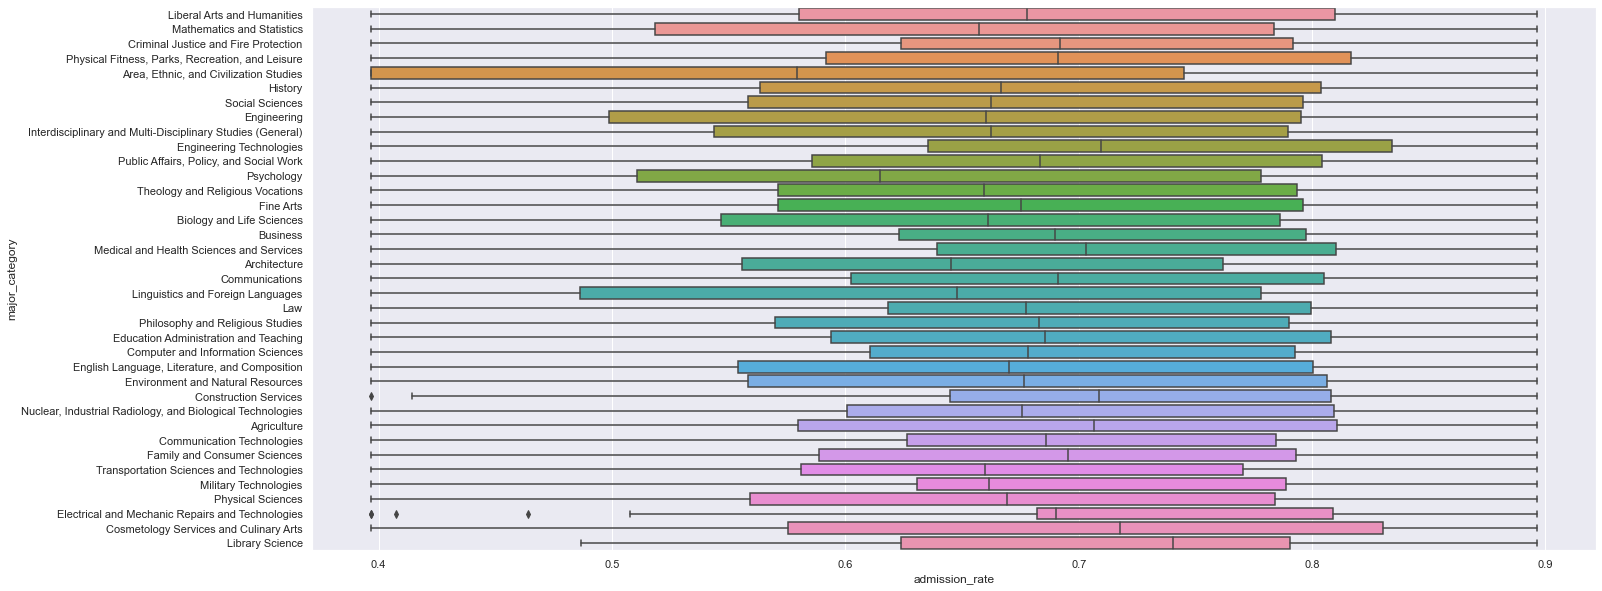

In [28]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='admission_rate', data = train1)

<AxesSubplot:xlabel='admission_rate', ylabel='major_category'>

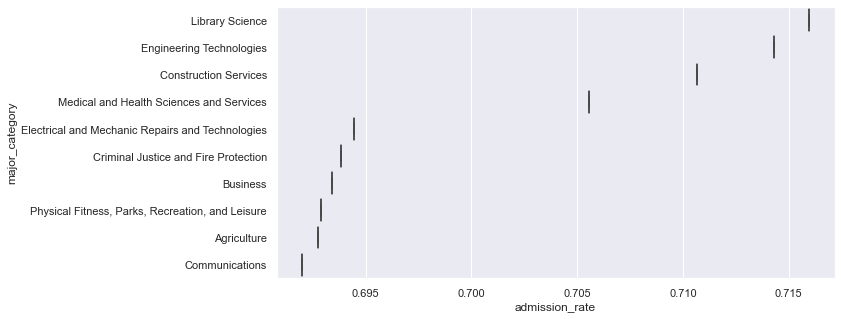

In [29]:
# top 10
plt.figure(figsize=(10, 5))
top10_admission_rate_major = train1.groupby('major_category').admission_rate.mean().nlargest(10).reset_index()
sns.boxplot(y='major_category',x='admission_rate', data = top10_admission_rate_major)

### 5. avg sat score by major

<AxesSubplot:xlabel='avg_sat_admitted', ylabel='major_category'>

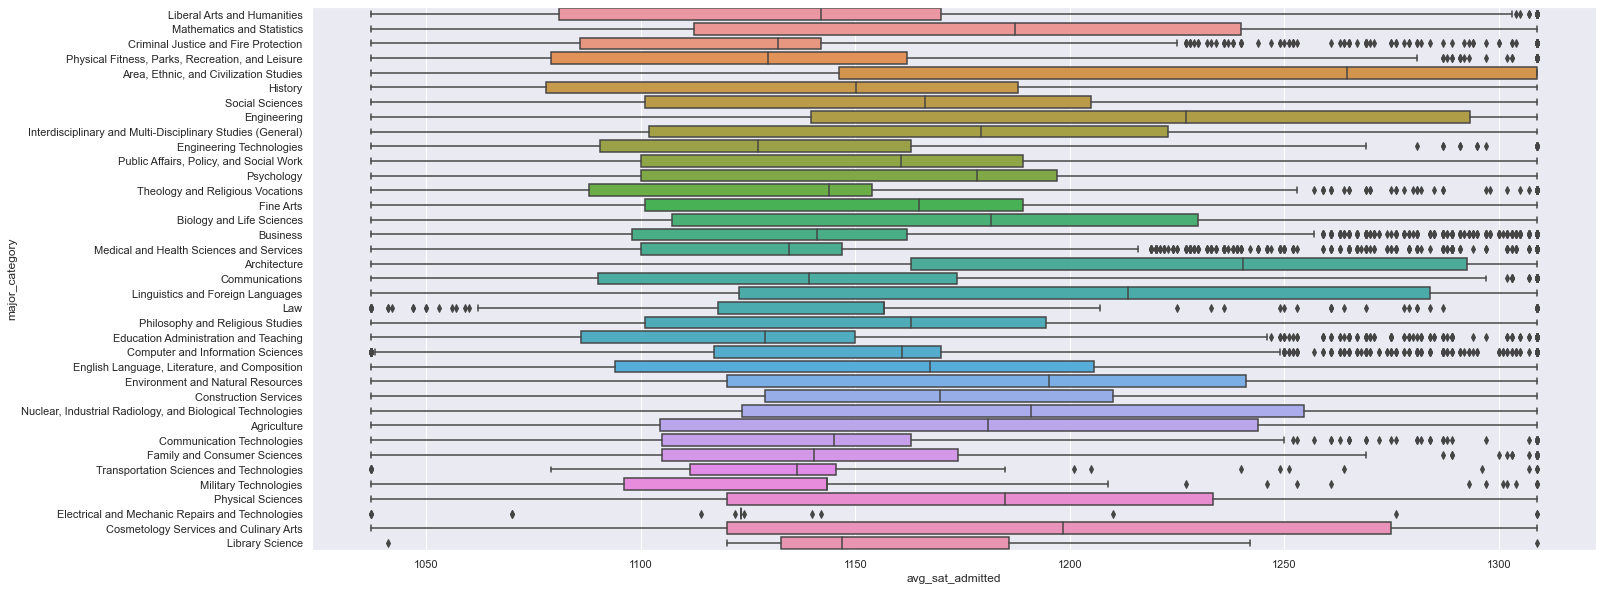

In [30]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='avg_sat_admitted', data = train1)

<AxesSubplot:xlabel='avg_sat_admitted', ylabel='major_category'>

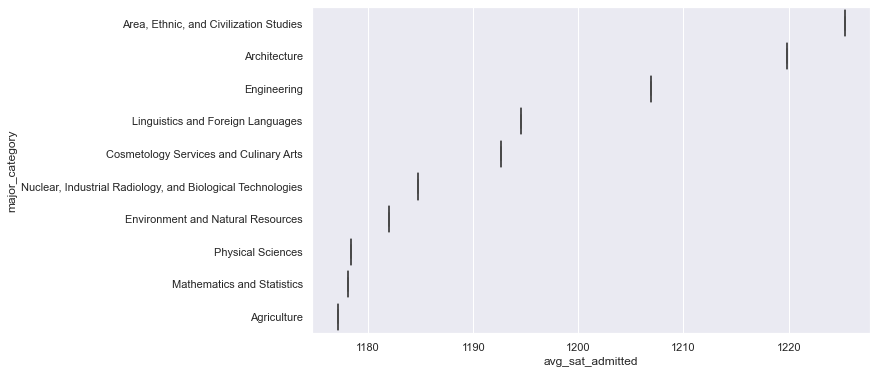

In [31]:
# top 10 avg sat score
plt.figure(figsize=(10, 6))
top10_sat_score_major = train1.groupby('major_category').avg_sat_admitted.mean().nlargest(10).reset_index()
sns.boxplot(y='major_category',x='avg_sat_admitted', data = top10_sat_score_major)

In [32]:
train1.groupby('major_category').avg_sat_admitted.mean().nlargest(10)

major_category
Area, Ethnic, and Civilization Studies                                   1,225.35
Architecture                                                             1,219.84
Engineering                                                              1,206.87
Linguistics and Foreign Languages                                        1,194.57
Cosmetology Services and Culinary Arts                                   1,192.67
Nuclear, Industrial Radiology, and Biological Technologies               1,184.78
Environment and Natural Resources                                        1,181.96
Physical Sciences                                                        1,178.33
Mathematics and Statistics                                               1,178.06
Agriculture                                                              1,177.10
Name: avg_sat_admitted, dtype: float64

### 5. ACT_score_mid by major

<AxesSubplot:xlabel='ACT_score_mid', ylabel='major_category'>

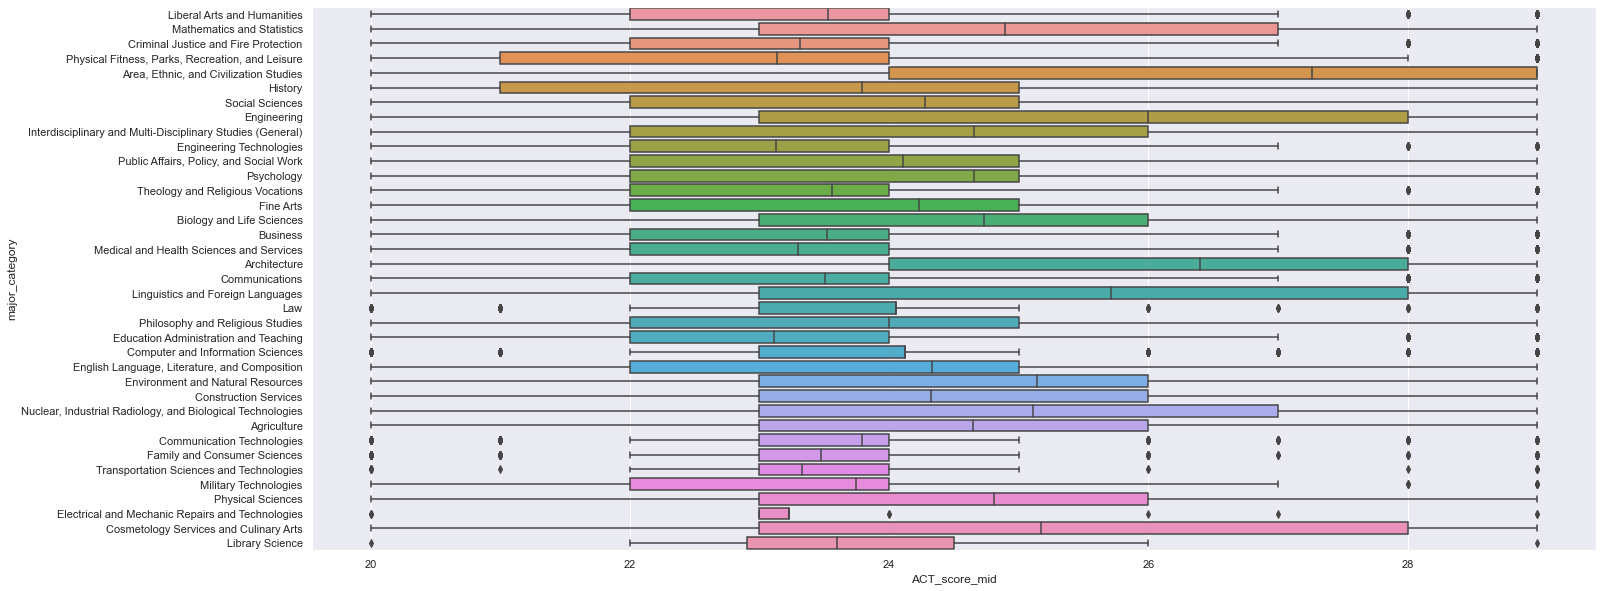

In [33]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='ACT_score_mid', data = train1)

<AxesSubplot:xlabel='ACT_score_mid', ylabel='major_category'>

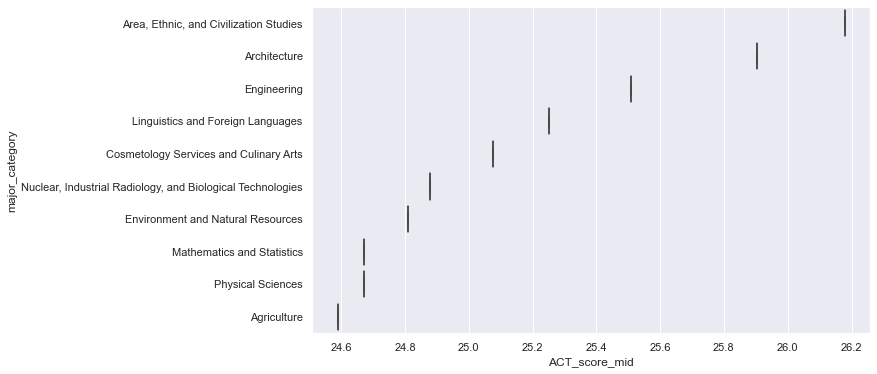

In [34]:
# top 10 avg sat score
plt.figure(figsize=(10, 6))
top10_act_score_major = train1.groupby('major_category').ACT_score_mid.mean().nlargest(10).reset_index()
sns.boxplot(y='major_category',x='ACT_score_mid', data = top10_act_score_major)

In [36]:
train1.groupby('major_category').ACT_score_mid.mean().nlargest(10)

major_category
Area, Ethnic, and Civilization Studies                                      26.18
Architecture                                                                25.91
Engineering                                                                 25.51
Linguistics and Foreign Languages                                           25.25
Cosmetology Services and Culinary Arts                                      25.08
Nuclear, Industrial Radiology, and Biological Technologies                  24.88
Environment and Natural Resources                                           24.81
Mathematics and Statistics                                                  24.67
Physical Sciences                                                           24.67
Agriculture                                                                 24.59
Name: ACT_score_mid, dtype: float64

* same order as SAT score

### 6. race by major

<AxesSubplot:xlabel='enrollment_share_hispanic', ylabel='major_category'>

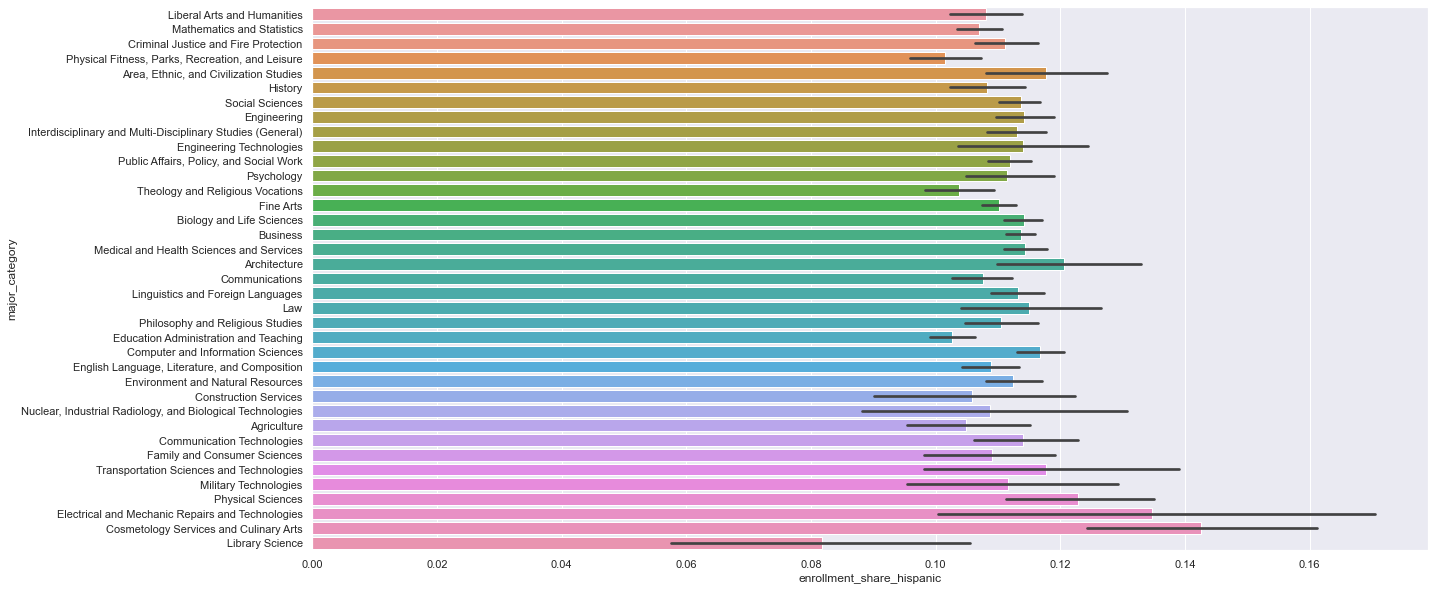

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(y='major_category', x='enrollment_share_hispanic', data=train1)

In [38]:
train1.groupby('major_category').enrollment_share_asian.mean().nlargest()

major_category
Area, Ethnic, and Civilization Studies                   0.07
Architecture                                             0.07
Cosmetology Services and Culinary Arts                   0.06
Engineering                                              0.06
Linguistics and Foreign Languages                        0.05
Name: enrollment_share_asian, dtype: float64

In [39]:
train1.groupby('major_category').enrollment_share_black.mean().nlargest()

major_category
Law                                                        0.12
Criminal Justice and Fire Protection                       0.12
Transportation Sciences and Technologies                   0.11
Family and Consumer Sciences                               0.11
Medical and Health Sciences and Services                   0.11
Name: enrollment_share_black, dtype: float64

In [40]:
train1.groupby('major_category').enrollment_share_white.mean().nlargest()

major_category
Construction Services                              0.62
Agriculture                                        0.62
Library Science                                    0.61
Theology and Religious Vocations                   0.60
Philosophy and Religious Studies                   0.60
Name: enrollment_share_white, dtype: float64

In [41]:
train1.groupby('major_category').enrollment_share_hispanic.mean().nlargest()

major_category
Cosmetology Services and Culinary Arts                             0.14
Electrical and Mechanic Repairs and Technologies                   0.13
Physical Sciences                                                  0.12
Architecture                                                       0.12
Area, Ethnic, and Civilization Studies                             0.12
Name: enrollment_share_hispanic, dtype: float64

## 2. Geographic
### 1. ROI by states

<AxesSubplot:xlabel='state_post_code', ylabel='roi_5yr'>

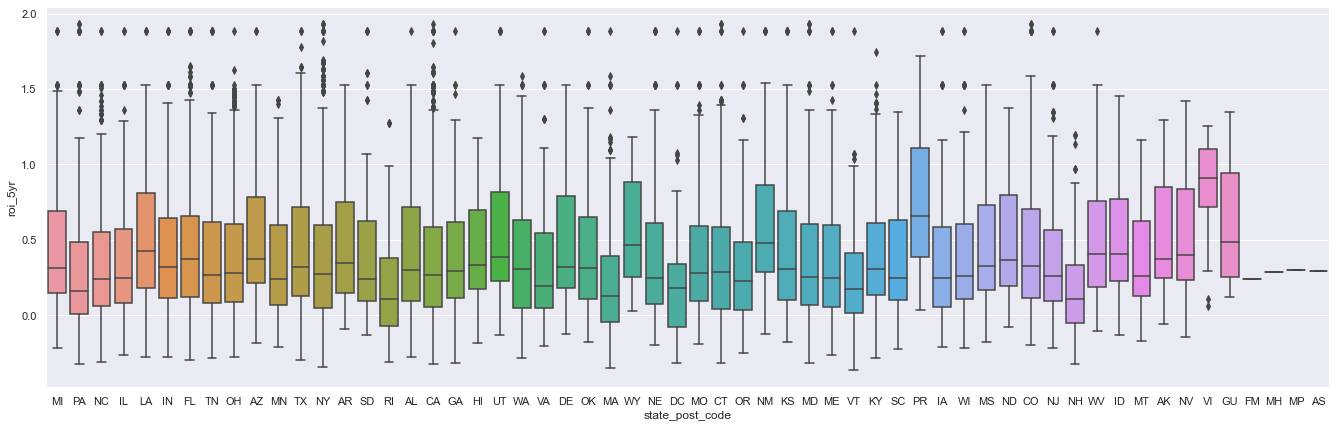

In [42]:
plt.figure(figsize=(23, 7))
sns.boxplot(x='state_post_code', y='roi_5yr', data = train1)

In [43]:
train1.groupby('state_post_code').roi_5yr.mean().nlargest(10)

state_post_code
VI                   0.82
PR                   0.75
NM                   0.61
GU                   0.58
WY                   0.56
UT                   0.53
AK                   0.52
WV                   0.50
NV                   0.50
ID                   0.49
Name: roi_5yr, dtype: float64

### 2. ROI by region

In [8]:
train1.groupby('region_ipeds').roi_5yr.mean().nlargest(10)

region_ipeds
territory                   0.74
southwest                   0.44
west                        0.39
southeast                   0.39
midwest                     0.37
northeast                   0.29
Name: roi_5yr, dtype: float64

<AxesSubplot:xlabel='region_ipeds', ylabel='roi_5yr'>

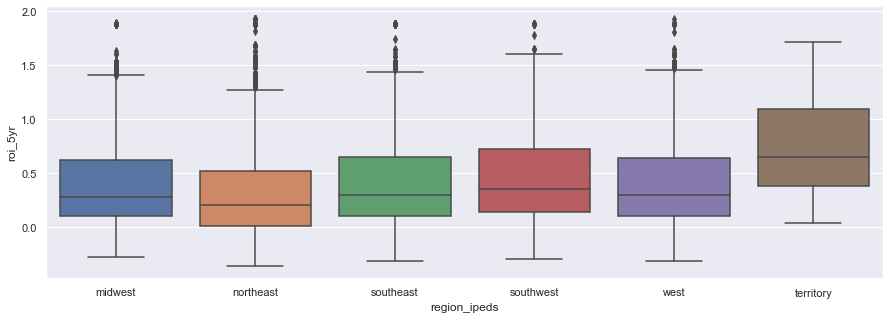

In [9]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='region_ipeds', y='roi_5yr', data = train1)

### 3. any relationship between major and states?

        Ho : majors and states have no association (they are indepemdent).

        Ha : majors and states have association (they are depemdent).

In [23]:
alpha = 0.05

observed = pd.crosstab(train1['major_category'], train1.state_post_code)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis, majors and states have association (they are depemdent)")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis, majors and states have association (they are depemdent)


## School basic info:
### 1. ROI  vs. avg net price by school control

In [44]:
train1.institution_control.value_counts()

Private, nonprofit     20718
Public                 16359
Private, for-profit     1308
Name: institution_control, dtype: int64

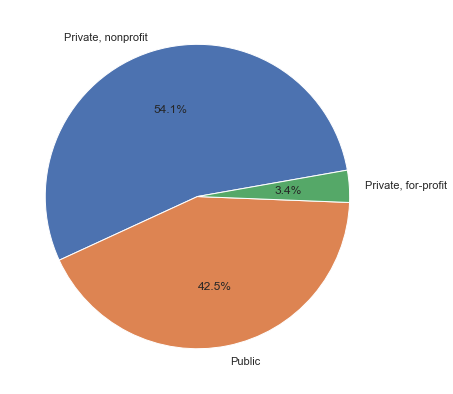

In [45]:
a =20817
b =16359
c =1308
d = a+b+c

plt.figure(figsize=(7,7))
y = np.array([a/d, b/d, c/d])
mylabels = ["Private, nonprofit", "Public", "Private, for-profit"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', startangle = 10)
plt.show() 

In [53]:
train1.groupby('institution_control').roi_5yr.mean().nlargest()

institution_control
Private, for-profit                   0.62
Public                                0.49
Private, nonprofit                    0.25
Name: roi_5yr, dtype: float64

<AxesSubplot:xlabel='institution_control', ylabel='roi_5yr'>

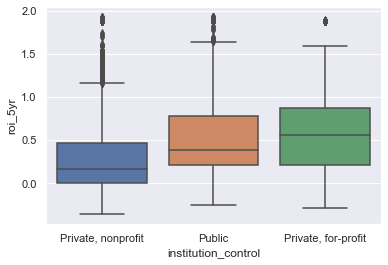

In [47]:
sns.boxplot(x='institution_control', y='roi_5yr', data=train1)

In [52]:
train1.groupby('institution_control').avg_net_price.mean().nlargest()

institution_control
Private, nonprofit               23,257.34
Private, for-profit              16,257.49
Public                           14,260.00
Name: avg_net_price, dtype: float64

<AxesSubplot:xlabel='institution_control', ylabel='avg_net_price'>

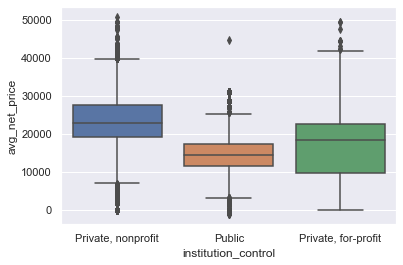

In [54]:
sns.boxplot(x='institution_control', y='avg_net_price', data=train1)

### 2. admission rate by school control

<AxesSubplot:xlabel='institution_control', ylabel='admission_rate'>

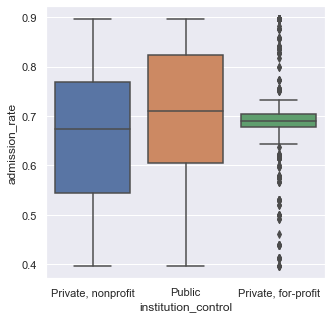

In [48]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='institution_control', y='admission_rate', data = train1)

In [49]:
train1.groupby('institution_control').admission_rate.mean()

institution_control
Private, for-profit                   0.70
Private, nonprofit                    0.65
Public                                0.70
Name: admission_rate, dtype: float64

* public school has the highest admission rate in the chart, private for-profit has a lot outliers.

### 3. relationship between control and states

In [12]:
alpha = 0.05

observed = pd.crosstab(train1['institution_control'], train1.state_post_code)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis, control and states have association (they are depemdent)")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis, control and states have association (they are depemdent)


Text(0, 0.5, 'state')

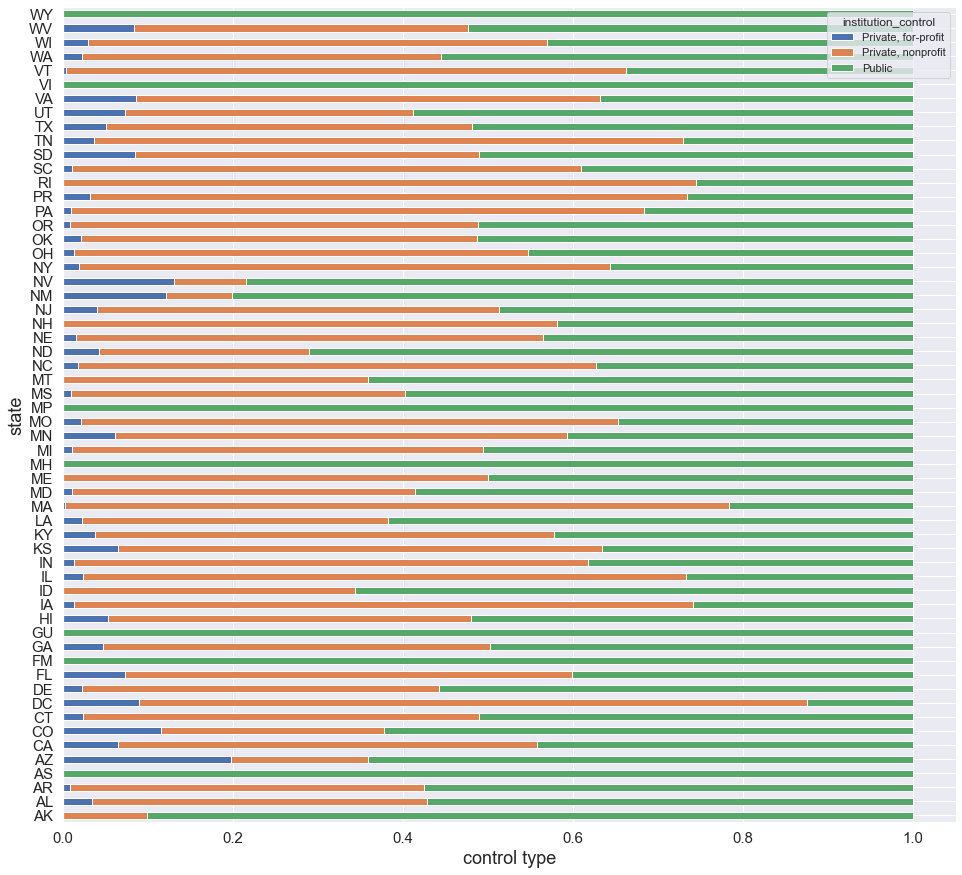

In [22]:
ctab_state_control = pd.crosstab(train.state_post_code, train1.institution_control, normalize = 'index')

ctab_state_control.plot.barh(stacked = True, figsize = (16, 15), fontsize = 15)
plt.xlabel('control type', fontsize = 18)
plt.ylabel('state', fontsize = 18)

Text(0, 0.5, 'region')

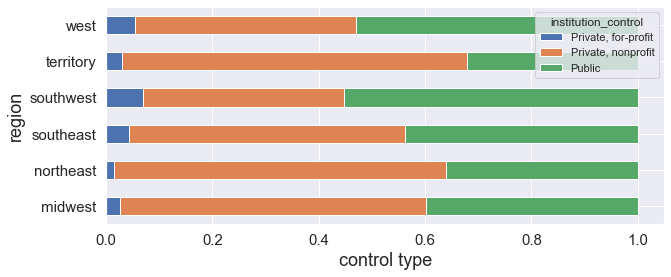

In [21]:
ctab_state_control = pd.crosstab(train.region_ipeds, train1.institution_control, normalize = 'index')

ctab_state_control.plot.barh(stacked = True, figsize = (10, 4), fontsize = 15)
plt.xlabel('control type', fontsize = 18)
plt.ylabel('region', fontsize = 18)

In [18]:
alpha = 0.05

observed = pd.crosstab(train1['institution_control'], train1.region_ipeds)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis, control and states have association (they are depemdent)")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis, control and states have association (they are depemdent)


<AxesSubplot:xlabel='online_only', ylabel='roi_5yr'>

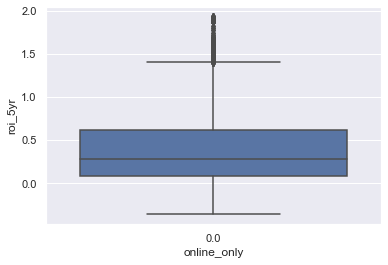

In [55]:
# online school with ROI ----- no data
sns.boxplot(x='online_only', y='roi_5yr', data=train1)

In [10]:
train1.online_only.value_counts()

0.00    38385
Name: online_only, dtype: int64

## Other features with 5-year-ROI
### 1. ROI and SAT, ACT score?
* pearson's R

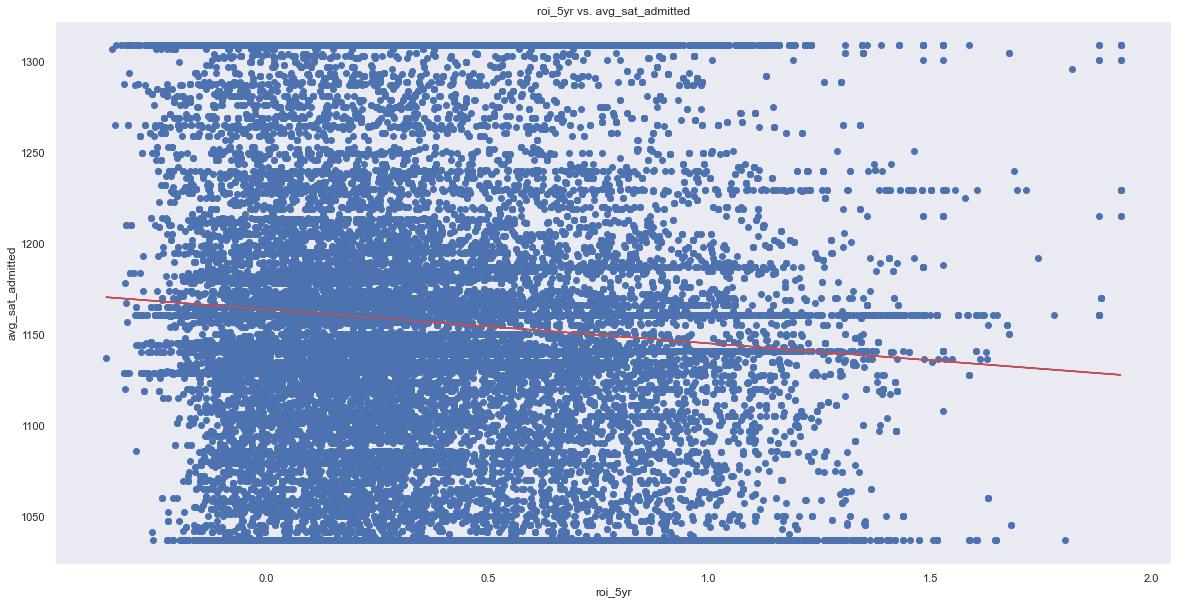

In [24]:
# SAT
plt.figure(figsize=(20,10))
plt.scatter(train1["roi_5yr"], train1["avg_sat_admitted"])

x = train1["roi_5yr"]
y = train1["avg_sat_admitted"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.xlabel("roi_5yr")
plt.ylabel("avg_sat_admitted")
plt.title("roi_5yr vs. avg_sat_admitted")
plt.grid()

H0 : There is no relationship between ROI and SAT score.

Ha : There is a relationship between ROI and SAT score.

In [25]:
alpha = 0.05
r, p = stats.pearsonr(train1["roi_5yr"], train1["avg_sat_admitted"])
if p < alpha:
    print('There is a relationship between ROI and SAT score.')
else:
    print('There is no relationship between ROI and SAT score.')

There is a relationship between ROI and SAT score.


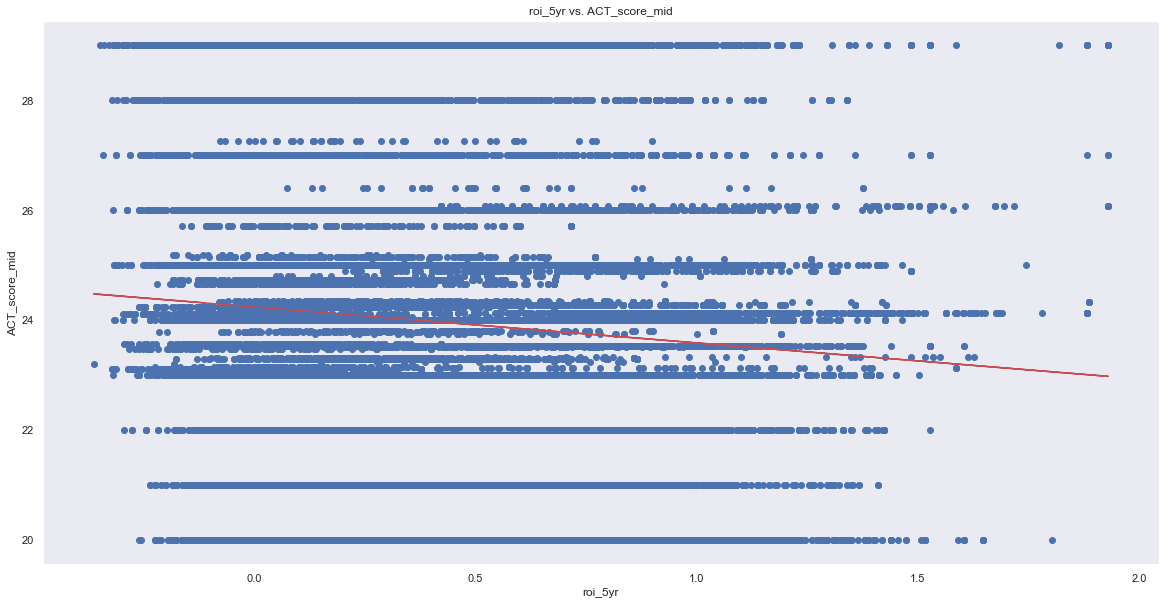

In [26]:
# ACT 
plt.figure(figsize=(20,10))
plt.scatter(train1["roi_5yr"], train1["ACT_score_mid"])

x = train1["roi_5yr"]
y = train1["ACT_score_mid"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.xlabel("roi_5yr")
plt.ylabel("ACT_score_mid")
plt.title("roi_5yr vs. ACT_score_mid")
plt.grid()

In [27]:
alpha = 0.05
r, p = stats.pearsonr(train1["roi_5yr"], train1["ACT_score_mid"])
if p < alpha:
    print('There is a relationship between ROI and ACT score.')
else:
    print('There is no relationship between ROI and ACT score.')

There is a relationship between ROI and ACT score.


<AxesSubplot:>

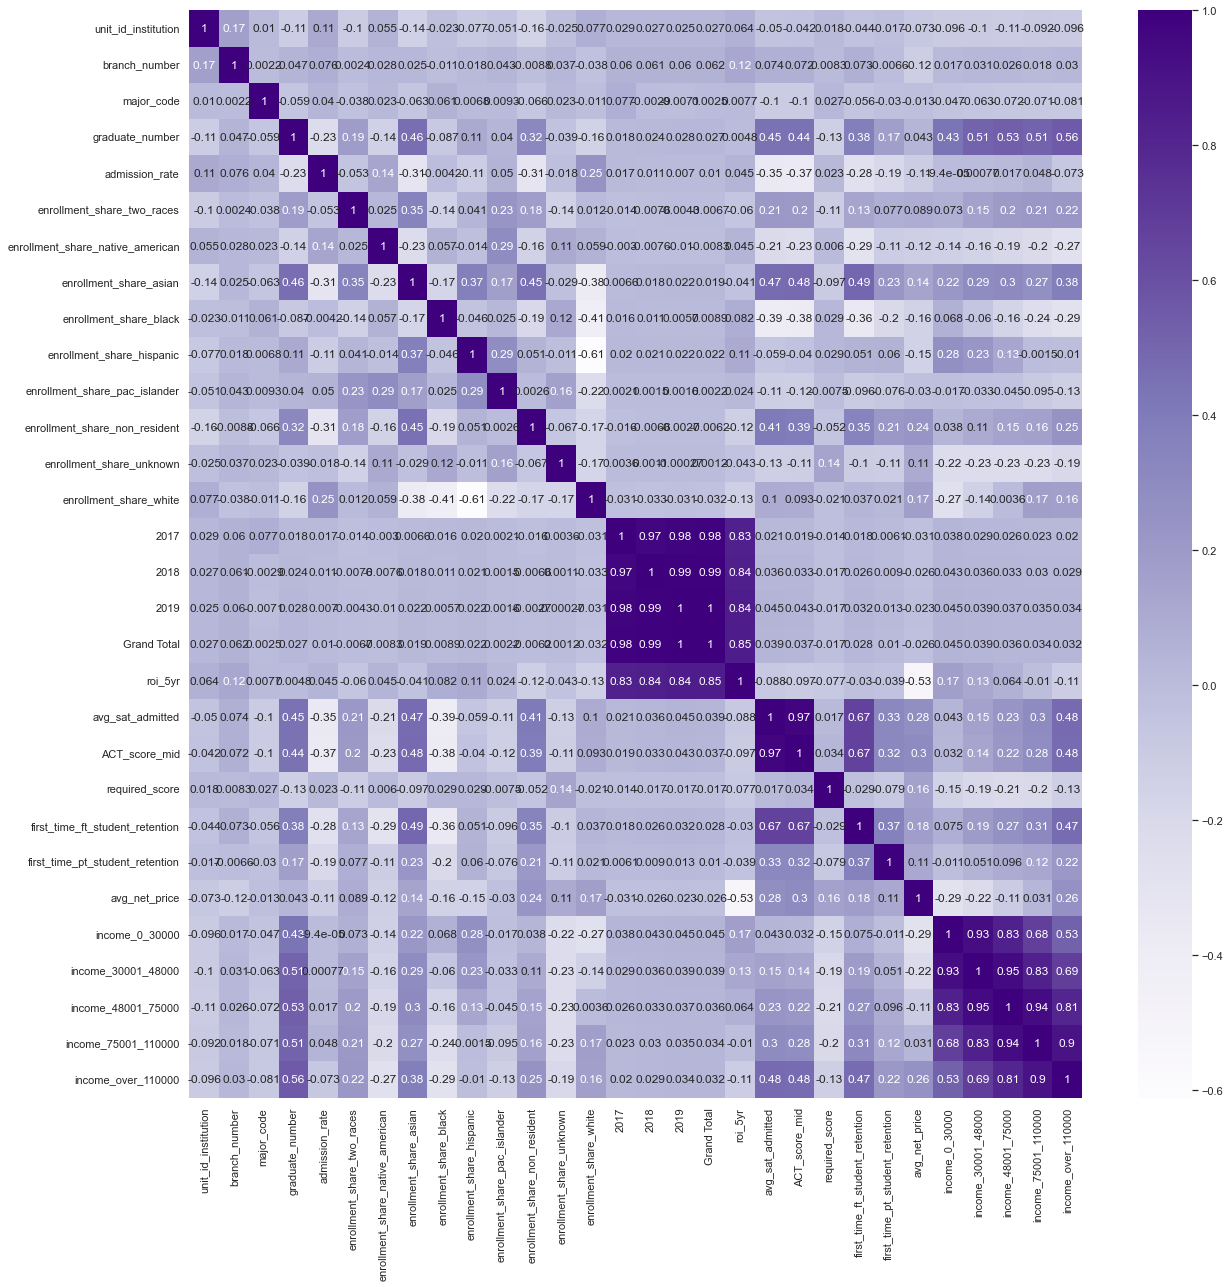

In [30]:
plt.figure(figsize=(20,20))
cols = ['title_IV_eligibility','online_only','pct_roi_5yr']
corr_df = train1.drop(columns = cols)
correlation_table = corr_df.corr()
sns.heatmap(correlation_table, cmap='Purples', annot=True)

1. SAT score and graduate number

<AxesSubplot:xlabel='graduate_number', ylabel='avg_sat_admitted'>

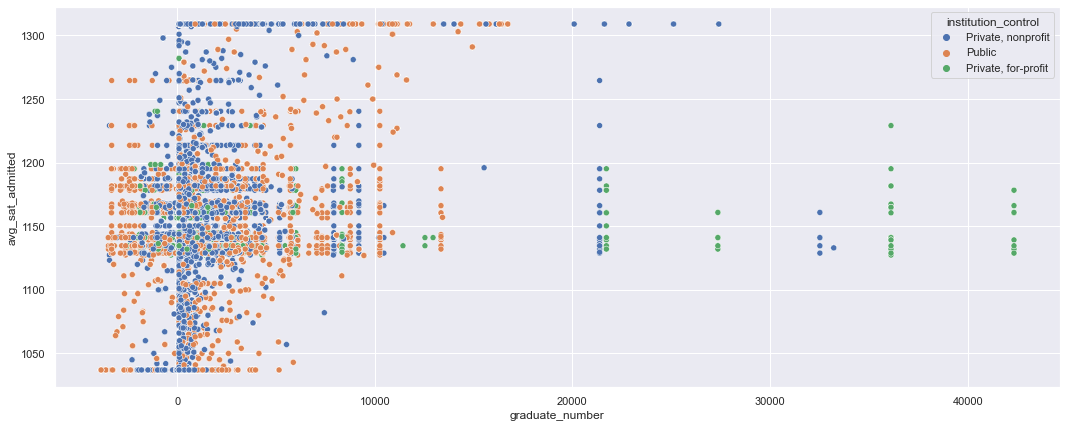

In [35]:
plt.figure(figsize=(18, 7))
sns.scatterplot(x='graduate_number', y='avg_sat_admitted', data=train1, hue = 'institution_control')

<Figure size 720x360 with 0 Axes>

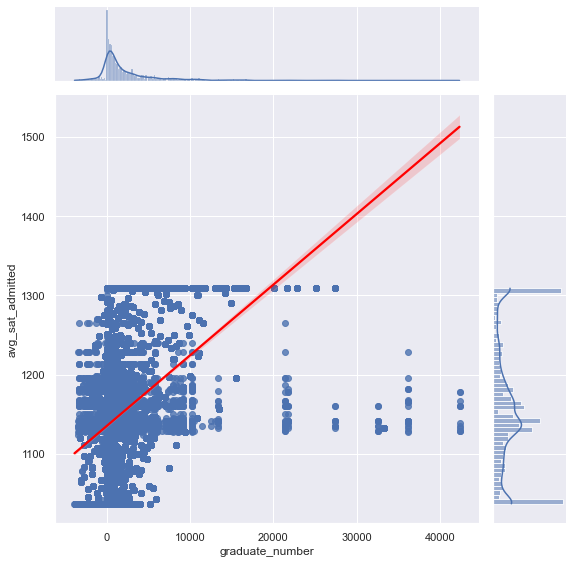

In [40]:
plt.figure(figsize=(10, 5))
sns.jointplot(x='graduate_number', y='avg_sat_admitted', data=train1, kind='reg', line_kws={'color': 'red'}, height=8)

In [39]:
alpha = 0.05
r, p = stats.pearsonr(train1["avg_sat_admitted"], train1["graduate_number"])
if p < alpha:
    print('There is a relationship between SAT score and graduate number.')
else:
    print('There is no relationship between SAT score and graduate number.')

There is a relationship between SAT score and graduate number.
